In [1]:
import pandas as pd
import numpy as np

# Visualision
import matplotlib.pyplot as plt
import seaborn as sns

### Training Data

In [2]:
initial_investment = 20000

train_df = pd.read_pickle(r'train_port_val_202205041011-train.p')

train_df = pd.DataFrame(train_df)

train_df.rename(columns = {0: 'Portfolio_Val'}, inplace = True)

train_df.head(10)

,Portfolio_Val
0,59540
1,28976
2,20211
3,36413
4,16236
5,20638
6,18625
7,73159
8,44729
9,11787


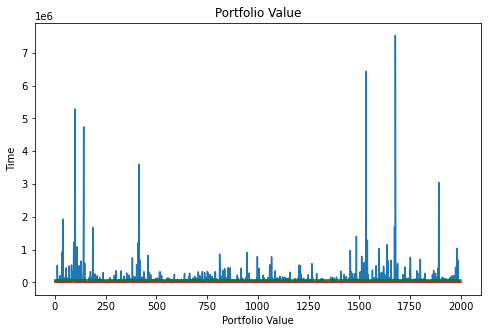

In [3]:
# Plot training data
def plot_data(data, title):
    plt.figure(figsize=(8,5))
    plt.title(title)
    plt.xlabel('Portfolio Value')
    plt.ylabel('Time')
    plt.plot(data)
    plt.plot([0, len(train_df)], [initial_investment, initial_investment], 'r-')

    # Plot a line for average of training data
    avg_data = np.mean(data)
    plt.plot([0, len(train_df)], [avg_data, avg_data], 'g-')

    plt.show()
plot_data(train_df, 'Portfolio Value')

### Validation Data

In [4]:
test_df = pd.read_pickle(r'test_port_val_202205041011-test.p')

test_df = pd.DataFrame(test_df)

test_df.rename(columns = {0: 'Portfolio_Val'}, inplace = True)

test_df.head(10)

,Portfolio_Val
0,6744
1,12578
2,2584753
3,11306
4,10588
5,1092
6,26951
7,77015
8,546908
9,919858


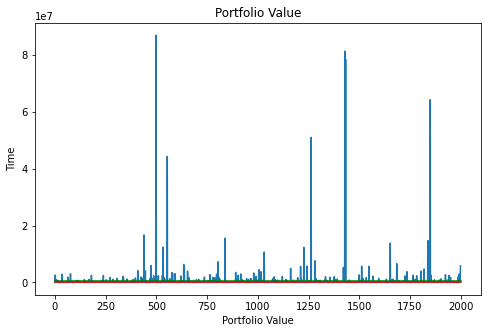

In [5]:
def plot_data_val(data, title):
    plt.figure(figsize=(8,5))
    plt.title(title)
    plt.xlabel('Portfolio Value')
    plt.ylabel('Time')
    plt.plot(data)
    plt.plot([0, len(test_df)], [initial_investment, initial_investment], 'r-')
    
    # Plot a line for average of Validation data
    avg_data = np.mean(data)
    plt.plot([0, len(test_df)], [avg_data, avg_data], 'g-')
    plt.show()
plot_data_val(test_df, 'Portfolio Value')

### Logrithmic representation

The data is represented in logrithmic scale, as it covers a wider range of values.

In [6]:
train_data_log = np.log2(train_df.iloc[:, 0])

In [7]:
test_data_log = np.log2(test_df.iloc[:, 0])

In [8]:
train_data_log.describe()

count    2000.000000
mean       14.709014
std         1.978749
min         7.721099
25%        13.535579
50%        14.587337
75%        15.799262
max        22.845293
Name: Portfolio_Val, dtype: float64

In [9]:
test_data_log.describe()

count    2000.000000
mean       14.766109
std         3.227942
min         7.467606
25%        12.413297
50%        14.600784
75%        16.970881
max        26.373038
Name: Portfolio_Val, dtype: float64

In [10]:
train_data_log

0       15.861572
1       14.822571
2       14.302853
3       15.152166
4       13.986909
          ...    
1995    13.732803
1996    13.396070
1997    13.516192
1998    15.304957
1999    11.656872
Name: Portfolio_Val, Length: 2000, dtype: float64

In [11]:
# log of initial investment
initial_investment_log = np.log2(initial_investment)

### Profit Percentage

In [18]:
# find the percentage of increase in portfolio value
def find_percentage(data):
    percentage = ((data - initial_investment_log) / initial_investment_log) * 100

    # Average of percentage
    avg_percentage = np.mean(percentage)

    avg_percentage = round(avg_percentage, 2)

    return avg_percentage

train_profit = find_percentage(train_data_log)

def find_percentage_test(data):
    percentage = ((data - initial_investment_log) / initial_investment_log) * 100

    avg_percentage = np.mean(percentage)

    # Show only 2 decimal places
    avg_percentage = round(avg_percentage, 2)

    return avg_percentage

test_profit = find_percentage_test(test_data_log)

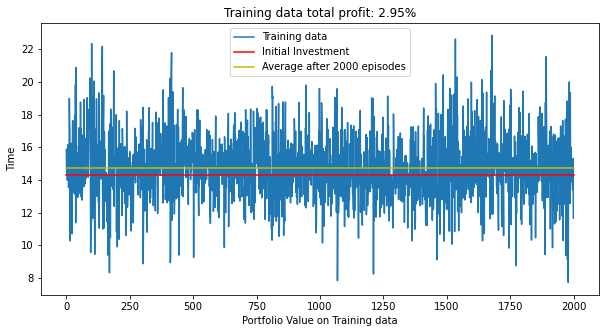

In [19]:
def plot_data_log(data, title):
    plt.figure(figsize=(10,5))
    plt.title('Training data total profit: {}%'.format(train_profit))
    plt.xlabel('Portfolio Value on Training data')
    plt.ylabel('Time')
    plt.plot(data)
    plt.plot([0, len(train_df)], [initial_investment_log, initial_investment_log], 'r-')
    
    # Plot a line for average of training data
    avg_data = np.mean(data)
    plt.plot([0, len(train_df)], [avg_data, avg_data], 'y-')
    plt.legend(['Training data', 'Initial Investment', 'Average after 2000 episodes'])
    plt.show()
plot_data_log(train_data_log, 'Portfolio Value Train data')

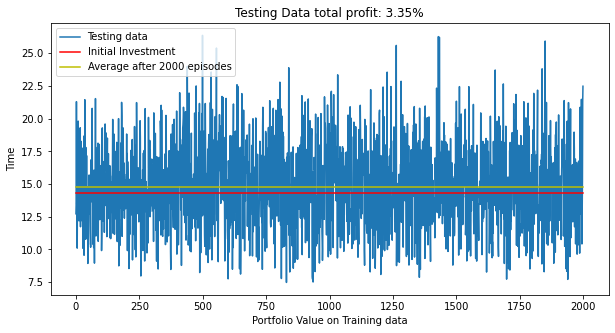

In [20]:
def plot_data_log(data, title):
    plt.figure(figsize=(10,5))
    plt.title("Testing Data total profit: {}%".format(test_profit))
    plt.xlabel('Portfolio Value on Training data')
    plt.ylabel('Time')
    plt.plot(data)
    plt.plot([0, len(test_df)], [initial_investment_log, initial_investment_log], 'r-')
    
    # Plot a line for average of training data
    avg_data = np.mean(data)
    plt.plot([0, len(test_df)], [avg_data, avg_data], 'y-')
    plt.legend(['Testing data', 'Initial Investment', 'Average after 2000 episodes'])
    plt.show()
plot_data_log(test_data_log, 'Portfolio Value Test data')

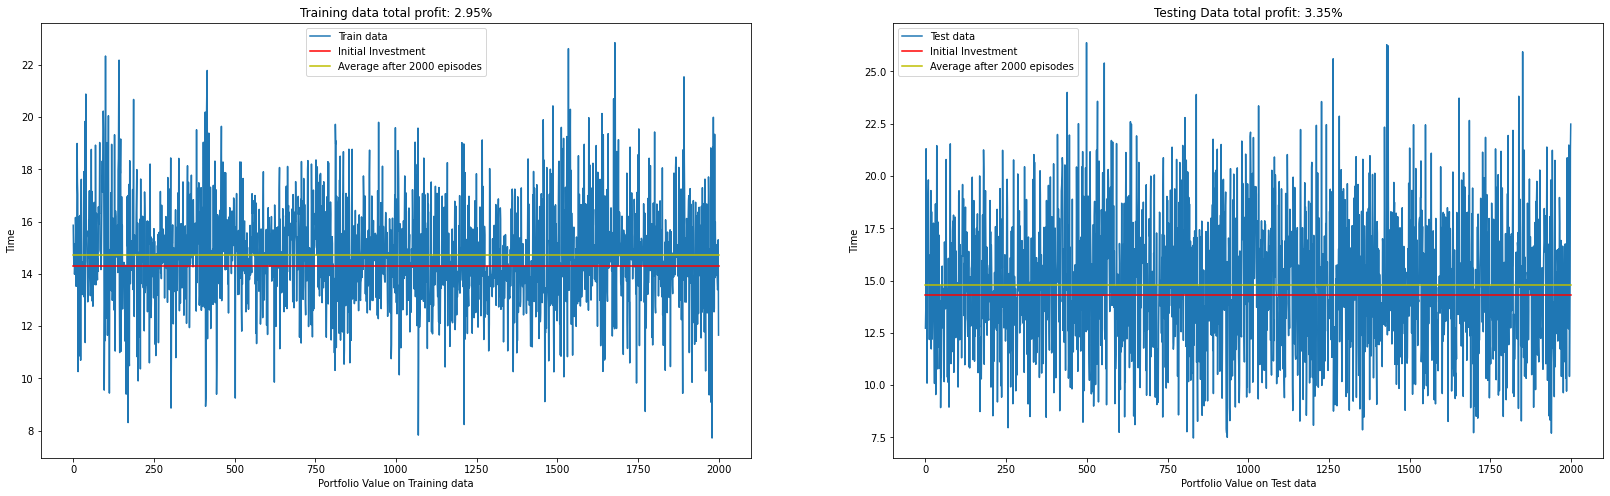

In [21]:
# subplot for training data and test data
def plot_data_log(data1, data2):
    plt.figure(figsize=(28,8))
    plt.subplot(1, 2, 1)
    plt.title('Training data total profit: {}%'.format(train_profit))
    plt.xlabel('Portfolio Value on Training data')
    plt.ylabel('Time')
    plt.plot(data1)
    plt.plot([0, len(train_df)], [initial_investment_log, initial_investment_log], 'r-')

    # Plot a line for average of training data
    avg_data = np.mean(data1)
    plt.plot([0, len(train_df)], [avg_data, avg_data], 'y-')
    plt.legend(['Train data', 'Initial Investment', 'Average after 2000 episodes'])

    plt.subplot(1, 2, 2)
    plt.title("Testing Data total profit: {}%".format(test_profit))
    plt.xlabel('Portfolio Value on Test data')
    plt.ylabel('Time')
    plt.plot(data2)
    plt.plot([0, len(test_df)], [initial_investment_log, initial_investment_log], 'r-')

    # Plot a line for average of training data
    avg_data = np.mean(data2)
    plt.plot([0, len(test_df)], [avg_data, avg_data], 'y-')
    plt.legend(['Test data', 'Initial Investment', 'Average after 2000 episodes'])

    plt.show()
plot_data_log(train_data_log, test_data_log)